# 学習したメソッドまとめ

後々メソッドを作る際の考え方の参考にするため学習したシミュレーション手法やメソッドなどをまとめておく

In [4]:
#各ライブラリインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.目標来場者達成までの日数を求めるシミュレーション

In [6]:
#来場者の合計が目標人数を超えるまでの日数をシミュレーションするメソッド
def simulation_day_over_t(threshold : int, lam_n : float) ->int:
    """
    決められた人数を超える日数をシミュレーションするメソッド
    -threshold:何人以上を超える来場者数になる日数をシミュレーションするか？
    -lam：Poisson分布の期待値、１日あたりの期待来客数
    """
    
    day=0
    total_customers=0
    while total_customers<=threshold:
        day += 1 #日数をカウント
        n_customer_each_day = np.random.poisson(lam=lam_n,size=1) #1日のお客さんの数
        total_customers+=n_customer_each_day #これまでのお客さんの数
        
    return day

"""
#ポアソン分布ではなく正規分布に従う場合
def simulation_day_over_t(threshold : int, loc_n : float, scale_n : float) ->int:

    day=0
    total_customers=0
    while total_customers<=threshold:
        day += 1 #日数をカウント
        n_customer_each_day = np.random.normal(loc=loc_n,
                                               scale=scale_n,
                                               size=1) #1日のお客さんの数
        total_customers+=n_customer_each_day #これまでのお客さんの数
    return day
"""

'\n#ポアソン分布ではなく正規分布に従う場合\ndef simulation_day_over_t(threshold : int, loc_n : float, scale_n : float) ->int:\n\n    day=0\n    total_customers=0\n    while total_customers<=threshold:\n        day += 1 #日数をカウント\n        n_customer_each_day = np.random.normal(loc=loc_n,\n                                               scale=scale_n,\n                                               size=1) #1日のお客さんの数\n        total_customers+=n_customer_each_day #これまでのお客さんの数\n    return day\n'

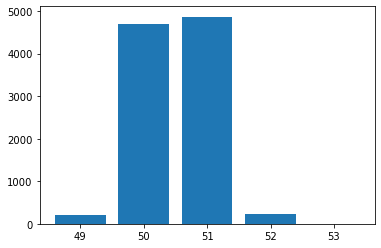

In [15]:
# simulation_day_over_tを10000回繰り返した結果をリストにする
N_TER=10000
result=[simulation_day_over_t(threshold=10000,lam_n=200.0) for i in range(N_ITER)]
#棒グラフで結果を可視化
days,cnt=np.unique(result, return_counts=True)
plt.bar([str(i) for i in days], cnt)
plt.show()

#### レジの待ち時間推定シミュレーション

In [17]:
#レジの個数、客数よりレジの待ち時間を推定するシミュレーション
#最後の客がレジを終えるまでの時間を求めるメソッド
#待ち時間は指数分布に従うものと仮定
def simulation_waiting_time(lam, n_customers, n_regis):
    """
    lam：一人あたりの待ち時間の平均
    n_customers ： 並んでいる客数
    n_regis : レジ数
    """
    #各レジに一人ずつ配置
    regi=np.random.exponential(scale=1/lam, size=n_regis)
    
    #各レジで捌けた箇所に次の客が行く、それを繰り返す
    for i in range(n_customers-n_regis):
        next_regi_id=regi.argmin()
        regi[next_regi_id] += np.random.exponential(scale=1/lam, size=1)
    return regi
    

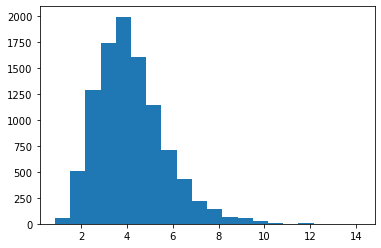

In [18]:
#シミュレーションを10000回繰り返して、レジの終了時間を調べる
N_ITER = 10000
result = [simulation_waiting_time(lam=1.0,
                                n_customers=10,
                                n_regis=3).max() for i in range(N_ITER)]
#予想される時間の分布
plt.hist(result,bins=20)
plt.show()